<a href="https://colab.research.google.com/github/zia207/Survival_Analysis_Python/blob/main/Colab_Notebook/02_07_03_01_survival_analysis_exponential_model_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1IFEWet-Aw4DhkkVe1xv_2YYqlvRe9m5_)

# 3.1 The Exponential Survival Model


This tutorial introduces the Exponential Model in survival analysis using R. We'll cover the basics of the model, how to fit it, interpret results, make predictions, and visualize outcomes. The Exponential Model is a parametric approach that assumes a constant hazard rate over time, making it suitable for scenarios where the risk of the event (e.g., failure or death) doesn't change with time. It's simple but often too restrictive for real-world data, where hazards may vary.


## Overview


The Exponential Model is a fundamental parametric model in survival analysis, assuming a constant hazard rate over time. This makes it simple but restrictive, as it implies the risk of an event (e.g., death, failure) does not change with time. Below, I explain the mathematical forms of the **probability density function (PDF)**, **survival function**, and **hazard function** for the Exponential Model, keeping the explanation concise yet comprehensive.


### Key Parameter


The Exponential Model is characterized by a single parameter, $\lambda > 0$, known as the **rate parameter** (or hazard rate). The mean survival time is $1/\lambda$, and the model assumes a memoryless property, meaning the probability of an event occurring does not depend on how much time has already passed.


###  Probability Density Function (PDF)


The PDF describes the probability distribution of the survival time $T$, a continuous random variable representing the time until the event occurs.

$$
  f(t) = \lambda e^{-\lambda t}, \quad t \geq 0, \quad \lambda > 0
$$

  - $f(t)$ gives the probability density of the event occurring at exactly time $t$.
  
  - The exponential decay term $e^{-\lambda t}$ reflects that longer survival times are less likely.
  
  - The parameter $\lambda$ scales the density, with higher $\lambda$ indicating a faster decay (shorter survival times).


### Survival Function


The survival function $S(t)$ represents the probability that the event has not occurred by time $t$, i.e., $P(T > t)$.

$$
  S(t) = e^{-\lambda t}, \quad t \geq 0
$$

  - Derived from the cumulative distribution function (CDF): $S(t) = 1 - F(t)$, where $F(t) = P(T \leq t) = 1 - e^{-\lambda t}$.

  - $S(t)$ decreases exponentially, starting at $S(0) = 1$ (100% survival at $t = 0$) and approaching 0 as $t \to \infty$.
  
  - A higher $\lambda$ leads to a steeper decline, indicating shorter survival times.


### Hazard Function


The hazard function $h(t)$ represents the instantaneous rate of occurrence of the event at time $t$, given survival up to that time. It is defined as $h(t) = \frac{f(t)}{S(t)}$.

$$
h(t) = \lambda, \quad t \geq 0
$$

  - The hazard is constant over time, a hallmark of the exponential model.
  
  - This implies the risk of the event (e.g., failure) remains the same regardless of how long the subject has survived.
  
  - $\lambda$ directly represents the hazard rate, e.g., if $\lambda = 0.01$, there’s a 0.01 probability of the event per unit of time.


### Relationships and Derivations


- **PDF from Hazard and Survival**:

$$
  f(t) = h(t) \cdot S(t) = \lambda \cdot e^{-\lambda t}
$$
- **Cumulative Hazard**: The cumulative hazard function is $H(t) = \int_0^t h(u) \, du = \lambda t$. This relates to the survival function via:

$$
  S(t) = e^{-H(t)} = e^{-\lambda t}
$$
- **Mean and Variance**:

  - Mean survival time: $E[T] = 1/\lambda$.
  
  - Variance: $\text{Var}(T) = 1/\lambda^2$.


### Practical Notes


- The constant hazard assumption ($h(t) = \lambda$) is often unrealistic in practice (e.g., in medical or reliability data, where risks may increase or decrease over time). Thus, the exponential model is best for scenarios like radioactive decay or certain mechanical systems with constant failure rates.




## Cheeck and Load Required Packages

In [15]:
import subprocess
import sys

def install_and_import(package_name, import_name=None):
    """Install a package if not already installed and import it"""
    if import_name is None:
        import_name = package_name

    try:
        # Try to import the package
        globals()[import_name] = __import__(import_name)
        print(f"{package_name} is already installed")
    except ImportError:
        # If not installed, install it
        print(f"Installing {package_name}...")
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])
            globals()[import_name] = __import__(import_name)
            print(f"{package_name} installed successfully")
        except Exception as e:
            print(f"Failed to install {package_name}: {e}")
            raise

# List of packages to check/install
packages = ['pandas', 'numpy', 'matplotlib', 'seaborn', 'scikit-learn', 'lifelines', 'pysurvival',  'statsmodels']

# Install and import each package
for pkg in packages:
    try:
        install_and_import(pkg)
    except Exception as e:
        print(f"Error with package {pkg}: {e}")

# Verify installation by importing
print("Installed packages:")
for pkg in packages:
    try:
        __import__(pkg)
        print(f"✓ {pkg}")
    except ImportError:
        print(f"✗ {pkg}")

pandas is already installed
numpy is already installed
matplotlib is already installed
seaborn is already installed
Installing scikit-learn...
Failed to install scikit-learn: No module named 'scikit-learn'
Error with package scikit-learn: No module named 'scikit-learn'
lifelines is already installed
Installing pysurvival...
Failed to install pysurvival: Command '['/usr/bin/python3', '-m', 'pip', 'install', 'pysurvival']' returned non-zero exit status 1.
Error with package pysurvival: Command '['/usr/bin/python3', '-m', 'pip', 'install', 'pysurvival']' returned non-zero exit status 1.
statsmodels is already installed
Installed packages:
✓ pandas
✓ numpy
✓ matplotlib
✓ seaborn
✗ scikit-learn
✓ lifelines
✗ pysurvival
✓ statsmodels


In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import subprocess
import sys

def install_package(package_name):
    """Install a package if not already installed"""
    try:
        __import__(package_name)
        print(f"{package_name} is already installed")
    except ImportError:
        print(f"Installing {package_name}...")
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])
            print(f"{package_name} installed successfully")
        except Exception as e:
            print(f"Failed to install {package_name}: {e}")
            raise

# Ensure scikit-learn is installed as pysurvival may depend on it
try:
    install_package('sklearn') # 'scikit-learn' is imported as 'sklearn'
except Exception:
    pass # Allow to continue if sklearn fails but pysurvival might still work

# Ensure pysurvival is installed
try:
    install_package('pysurvival')
except Exception:
    pass # Allow to continue with other imports even if pysurvival fails

from sklearn.model_selection import train_test_split
# from pysurvival.models.simulations import SimulationModel
# from pysurvival.models.parametric import GompertzModel
# from pysurvival.utils.metrics import concordance_index
# from pysurvival.utils.display import integrated_brier_score

sklearn is already installed
Installing pysurvival...
Failed to install pysurvival: Command '['/usr/bin/python3', '-m', 'pip', 'install', 'pysurvival']' returned non-zero exit status 1.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from lifelines import ExponentialFitter, KaplanMeierFitter
from lifelines.plotting import plot_lifetimes
from lifelines.utils import survival_table_from_events
from lifelines.statistics import logrank_test

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
plt.style.use('seaborn-v0_8')
# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

## Implementation in Python


This tutorial introduces the **Exponential Model** in survival analysis using **Python**.The Exponential Model assumes a **constant hazard rate** over time (memoryless property), making it simple but often restrictive. Below is a step-by-step implementation in Python using the `lifelines` library.


### Data


We'll use the built-in `lung` dataset from the `survival` package for demonstration. This dataset contains survival times for patients with advanced lung cancer. Key variables:

   - `time`: Survival time in days.
   - `status`: Censoring indicator (1 = censored, 2 = dead; we'll recode it to 0/1 for standard use).
   - Covariates like `age`, `sex`, etc.



In [4]:
# Load the dataset
url = "https://raw.githubusercontent.com/zia207/Survival_Analysis_Python/main/Data/lung_dataset.csv"
lung_data = pd.read_csv(url)


   Note: For your own data, ensure you have a time variable and a status indicator (0 = censored, 1 = event occurred).


### Preparing the Data


In survival analysis, we use the `Surv()` function to create a survival object that handles time and censoring.


In [5]:
# Create working copy
data = lung_data.copy()

# Preprocessing
# Original: sex: 1=male, 2=female → convert to 0=male, 1=female
data['sex'] = data['sex'].map({1: 0, 2: 1})
data['sex'] = data['sex'].astype('category')
data['sex_name'] = data['sex'].map({0: 'Male', 1: 'Female'})

# Handle missing values in ECOG performance score (ph.ecog)
data['ph.ecog'].fillna(data['ph.ecog'].median(), inplace=True)

# Event indicator: status == 1 → death (event), status == 2 → censored
data['event'] = (data['status'] == 1).astype(int)

# Select key variables
df = data[['time', 'event', 'age', 'sex', 'wt.loss', 'ph.ecog']].copy()

print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nEvent rate:", df['event'].mean().round(3))


Dataset shape: (228, 6)

First 5 rows:
   time  event  age sex  wt.loss  ph.ecog
0   306      0   74   0      NaN      1.0
1   455      0   68   0     15.0      0.0
2  1010      1   56   0     15.0      0.0
3   210      0   57   0     11.0      1.0
4   883      0   60   0      0.0      0.0

Event rate: 0.276


| Function | Formula | Meaning |
|----|----|----|
| PDF | \$ f(t) = \\lambda e\^{-\\lambda t} \$ | Density of failure at time \$t\$ |
| Survival function | \$ S(t) = e\^{-\\lambda t} \$ | Prob(survive beyond \$t\$) |
| Hazard function | \$ h(t) = \\lambda \$ | **Constant** instantaneous risk |
| Mean survival time | \$ E\[T\] = \\frac{1}{\\lambda} \$ | Average survival time |
| Median survival time | \$ \\text{median} = \\frac{\\ln(2)}{\\lambda} \\approx \\frac{0.693}{\\lambda} \$ |  |


### Fitting the Exponential Model

| Function | Formula | Meaning |
|------------------------|------------------------|------------------------|
| PDF | $f(t) = \lambda e^{-\lambda t}$ | Density of failure at time \$t\$ |
| Survival function | $S(t) = e^{-\lambda t}$ | Prob(survive beyond \$t\$) |
| Hazard function | $h(t) = \lambda$ | **Constant** instantaneous risk |
| Mean survival time | $E[T] = \frac{1}{\lambda}$ | Average survival time |
| Median survival time | $\text{median} = \frac{ln(2)}{\lambda}\approx \frac{0.693}{\lambda}$ |  |

#### Without Covariates (Intercept-Only Model)


This estimates a single parameter: the constant hazard rate (or equivalently, the scale parameter).


In [6]:
# Fit intercept-only (null) exponential model
exp_fitter = ExponentialFitter()
exp_fitter.fit(durations=df['time'], event_observed=df['event'])

exp_fitter.print_summary()

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 228 total observations, 165 right-censored observations>
   number of observations = 228
number of events observed = 63
           log-likelihood = -504.46
               hypothesis = lambda_ != 0

---
           coef  se(coef)  coef lower 95%  coef upper 95%
lambda_ 1104.65    139.17          831.88         1377.42

         cmp to    z      p  -log2(p)
lambda_    0.00 7.94 <0.005     48.78
---
AIC = 1010.92


Output interpretation:

- The `Scale` parameter is the mean survival time (since exponential mean = 1 / hazard rate).

- For exponential, the hazard rate λ = 1 / exp(Intercept).

- Log-likelihood and p-values help assess fit.


#### With Covariates


We use lifelines’s `WeibullAFTFitter` to fit a Weibull model with covariates.WeibullAFTFitter with shape fixed to 1 → becomes exponential.



In [7]:
from lifelines import WeibullAFTFitter

# Exponential = Weibull with shape = 1
# Check for missing values in variables used by the model and drop them
cols = ['time', 'event', 'age', 'sex', 'ph.ecog', 'wt.loss']
print("Missing values before cleaning:\n", df[cols].isnull().sum())

df_model = df[cols].dropna()
print(f"Using {len(df_model)} rows after dropping {len(df) - len(df_model)} rows with missing values.")

aft_exp = WeibullAFTFitter()
aft_exp.fit(df_model, duration_col='time', event_col='event',
            formula="age + sex + ph.ecog + wt.loss")

aft_exp.print_summary()

Missing values before cleaning:
 time        0
event       0
age         0
sex         0
ph.ecog     0
wt.loss    14
dtype: int64
Using 214 rows after dropping 14 rows with missing values.


<lifelines.WeibullAFTFitter: fitted with 214 total observations, 152 right-censored observations>
             duration col = 'time'
                event col = 'event'
   number of observations = 214
number of events observed = 62
           log-likelihood = -470.69
         time fit was run = 2026-01-08 14:57:18 UTC

---
                   coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param   covariate                                                                                                  
lambda_ Intercept  6.08    436.80      0.47            5.17            6.99              175.22             1088.87
        age        0.01      1.01      0.01           -0.01            0.02                0.99                1.02
        sex[T.1]  -0.31      0.73      0.13           -0.57           -0.04                0.56                0.96
        ph.ecog    0.14      1.15      0.11           -0.08            0.36                0.92                1.43
        wt.loss    0.00      1.00      0.01           -0.01            0.01                0.99                1.01
rho_    Intercept  0.68      1.98      0.09            0.50            0.86                1.65                2.37

                   cmp to     z      p  -log2(p)
param   covariate                               
lambda_ Intercept    0.00 13.04 <0.005    126.79
        age          0.00  1.16   0.24      2.03
        sex[T.1]     0.00 -2.29   0.02      5.50
        ph.ecog      0.00  1.23   0.22      2.20
        wt.loss      0.00  0.10   0.92      0.12
rho_    Intercept    0.00  7.33 <0.005     41.98
---
Concordance = 0.59
AIC = 953.39
log-likelihood ratio test = 9.46 on 4 df
-log2(p) of ll-ratio test = 4.31


Interpretation:

- Coefficients are on the log-scale for time. A positive coefficient means the covariate increases survival time (decelerates failure).
- For example, if the coefficient for `sex` is positive, females have longer survival times.
- Hazard ratio for a covariate: exp(-coefficient), since it's AFT.

To test model significance, use ANOVA or compare to a null model:


### Interpretation of Coefficients


- Coefficients are on log-time scale
- Positive coefficient → longer survival time (time acceleration)
- Hazard ratio for covariate $x$: $\exp(-\beta) $, where $\beta$ is the coefficient\exp(-\beta) $


In [8]:
# Extract hazard ratios (robust to different shapes returned by lifelines)
def _extract_param(obj, param='lambda_'):
	"""Return a Series (indexed by covariate names) for the requested param
	from a DataFrame/Series that may have params laid out in different ways."""
	if isinstance(obj, pd.DataFrame):
		# case: param is a column
		if param in obj.columns:
			s = obj[param]
			return s.squeeze()
		# case: param is an index (row)
		if param in obj.index:
			return obj.loc[param].squeeze()
		# case: columns are MultiIndex with first level as param
		if isinstance(obj.columns, pd.MultiIndex):
			cols = [c for c in obj.columns if c[0] == param]
			if cols:
				sub = obj[cols]
				if sub.shape[1] == 1:
					return sub.iloc[:, 0].squeeze()
				return sub
		# fallback: try to find any column name containing param
		for col in obj.columns:
			if param in str(col):
				return obj[col].squeeze()
	else:  # Series
		if isinstance(obj.index, pd.MultiIndex):
			lvl0 = obj.index.get_level_values(0)
			mask = lvl0 == param
			if mask.any():
				s = obj[mask]
				# if there is a second level, set it as index
				if obj.index.nlevels > 1:
					s.index = obj.index.get_level_values(1)[mask]
				return s.squeeze()
		if param in obj.index:
			return obj.loc[param].squeeze()
	raise KeyError(f"Parameter '{param}' not found in object")

# get coefficient estimates for the 'lambda_' parameter
coeffs = _extract_param(aft_exp.params_, 'lambda_').astype(float)

# extract CI for the same parameter (may be DataFrame with lower/upper cols or Series)
ci_obj = _extract_param(aft_exp.confidence_intervals_, 'lambda_')

# Normalize CI into lower and upper Series
if isinstance(ci_obj, pd.DataFrame):
	# assume first col = lower, second = upper (typical lifelines ordering)
	lower_beta = ci_obj.iloc[:, 0].astype(float)
	upper_beta = ci_obj.iloc[:, 1].astype(float)
else:
	# if only a single column/series, treat as both bounds (fallback)
	lower_beta = ci_obj.astype(float)
	upper_beta = ci_obj.astype(float)

# Hazard ratios for AFT: HR = exp(-beta)
hr = np.exp(-coeffs)
# Note: CI for HR: lower = exp(-upper_beta), upper = exp(-lower_beta)
hr_ci_lower = np.exp(-upper_beta)
hr_ci_upper = np.exp(-lower_beta)

result = pd.concat([hr.rename('HR'), hr_ci_lower.rename('CI_lower'), hr_ci_upper.rename('CI_upper')], axis=1).round(3)

print("\nHazard Ratios (lower HR = better survival):")
print(result)


Hazard Ratios (lower HR = better survival):
              HR  CI_lower  CI_upper
covariate                           
Intercept  0.002     0.001     0.006
age        0.991     0.977     1.006
sex[T.1]   1.362     1.045     1.774
ph.ecog    0.872     0.701     1.085
wt.loss    0.999     0.989     1.010


### Making Predictions


#### Median Survival Time for a New Patient


In [9]:
# Example: 65-year-old female, ECOG=1, no weight loss
new_patient = pd.DataFrame({
    'age': [65],
    'sex': [1],      # 1 = female
    'ph.ecog': [1],
    'wt.loss': [0]
})

# Ensure the factor encoding for 'sex' matches the training data used for aft_exp
# (the model was trained on df_model where 'sex' is categorical -> 'sex[T.1]' was created)
if 'sex' in df_model.columns and pd.api.types.is_categorical_dtype(df_model['sex']):
    new_patient['sex'] = pd.Categorical(new_patient['sex'], categories=df_model['sex'].cat.categories)
else:
    # fallback: cast to same dtype as training column (may be int or category)
    try:
        new_patient['sex'] = new_patient['sex'].astype(df_model['sex'].dtype)
    except Exception:
        # last-resort: leave as-is (but this may still raise an error)
        pass

median_time = aft_exp.predict_median(new_patient)
print(f"Predicted median survival time: {median_time.iloc[0]:.1f} days")

Predicted median survival time: 541.7 days


#### Survival Probability at Specific Time

In [ ]:
# Survival probability at 500 days
surv_prob = aft_exp.predict_survival_function(new_patient, times=500)

# predict_survival_function returns a DataFrame (index = times, columns = observations).
# For a single patient, extract the scalar value before formatting.
prob_500 = surv_prob.iloc[0, 0]  # first row, first column
print(f"Probability of surviving >500 days: {prob_500:.3f}")

Probability of surviving >500 days: 0.553


### Plotting and Visualization

#### Survival Curve

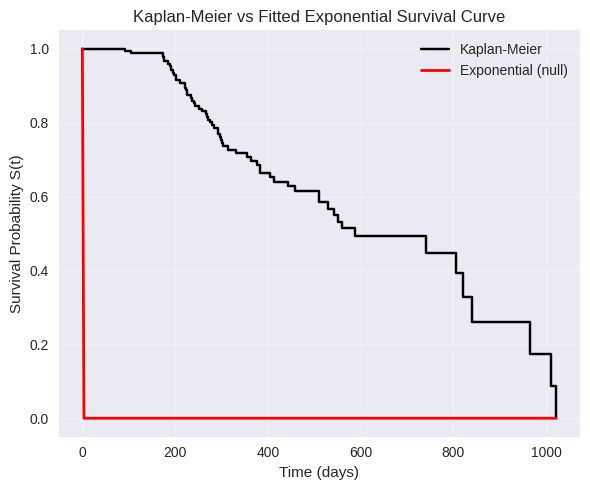

In [10]:
kmf = KaplanMeierFitter()
kmf.fit(durations=df['time'], event_observed=df['event'], label='Kaplan-Meier')

# Plot
fig, ax = plt.subplots(figsize=(6, 5))

kmf.plot_survival_function(ax=ax, color='black', ci_show=False)

# Add fitted exponential (null model) curve
t = np.linspace(0, df['time'].max(), 300)
lambda_null = exp_fitter.lambda_
S_exp = np.exp(-lambda_null * t)
ax.plot(t, S_exp, color='red', linewidth=2, label='Exponential (null)')

ax.set_title('Kaplan-Meier vs Fitted Exponential Survival Curve')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Survival Probability S(t)')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Model Diagnostics for the Exponential Model

Diagnostics for the exponential model aim to:

#### Check the Constant Hazard Assumption


The exponential model assumes a constant hazard rate ($h(t) = \lambda$). We can verify this using a log-cumulative hazard plot, where the cumulative hazard $H(t) = \lambda t$ should be linear.


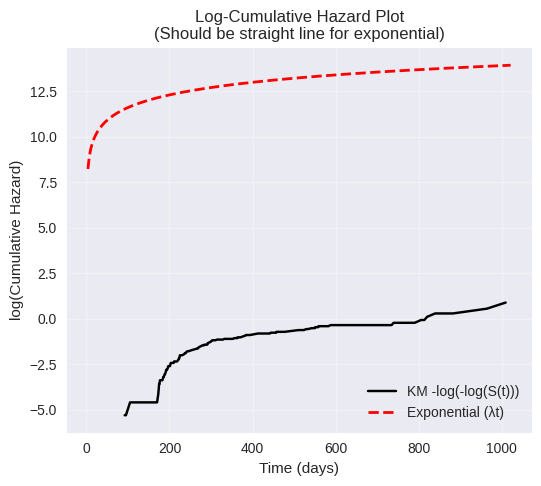

In [11]:
# Compute -log(S(t)) from KM → cumulative hazard
kmf.fit(df['time'], df['event'])
cumhaz = -np.log(kmf.survival_function_)

fig, ax = plt.subplots(figsize=(6, 5))
ax.plot(cumhaz.index, np.log(cumhaz.values), 'k-', label='KM -log(-log(S(t)))')
ax.plot(t, np.log(lambda_null * t), 'r--', linewidth=2, label='Exponential (λt)')

ax.set_title('Log-Cumulative Hazard Plot\n(Should be straight line for exponential)')
ax.set_xlabel('Time (days)')
ax.set_ylabel('log(Cumulative Hazard)')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()


#### Residual Analysis

Examine residuals (e.g., Cox-Snell or deviance residuals) to assess model fit and identify outliers or influential points.

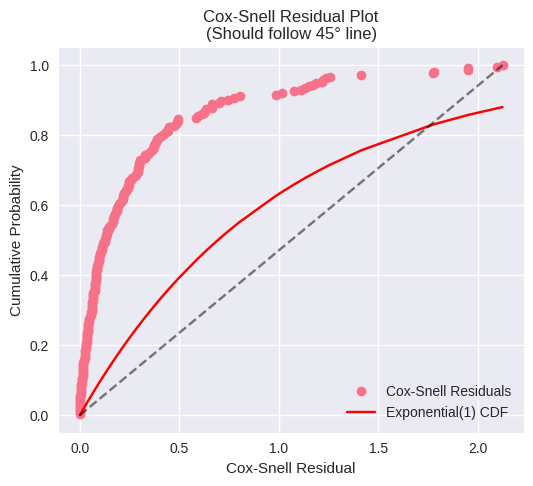

In [12]:
# NOTE: Use the same data frame that was used to fit the model (df_model)
# so that factor/dummy encoding matches the training specification.
# Predicted survival time for each individual (on the training rows)
pred_logtime = aft_exp.predict_expectation(df_model)
pred_time = np.exp(pred_logtime)

# Cox-Snell residuals: r_i = H(t_i | x_i) = -log(S(t_i | x_i))
# WeibullAFTFitter does not implement predict_partial_hazard.
# Instead compute the individual cumulative hazard at each subject's observed time.
def _cumhaz_at_time(row):
	# Build a single-row DataFrame and ensure categorical encoding matches training data
	row_df = row.to_frame().T.copy()
	# If 'sex' was treated as categorical when fitting, enforce same categories here
	if 'sex' in row_df.columns and 'sex' in df_model.columns:
		try:
			if pd.api.types.is_categorical_dtype(df_model['sex']):
				row_df['sex'] = pd.Categorical(row_df['sex'], categories=df_model['sex'].cat.categories)
		except Exception:
			# fallback: leave as-is if anything goes wrong
			pass
	# predict_cumulative_hazard expects a DataFrame of rows; pass the single-row DataFrame
	H_df = aft_exp.predict_cumulative_hazard(row_df, times=[row['time']])
	return float(H_df.iloc[0, 0])

# Compute residuals on df_model (the same data used to fit aft_exp)
residuals_cs = df_model.apply(_cumhaz_at_time, axis=1).values

# Plot residuals vs exponential(1) CDF
fig, ax = plt.subplots(figsize=(6,5))
# filter out non-finite values just in case
finite_res = residuals_cs[np.isfinite(residuals_cs)]
sorted_res = np.sort(finite_res)
n = len(sorted_res)
ax.plot(sorted_res, np.arange(1, n+1)/n, 'o', label='Cox-Snell Residuals')
ax.plot(sorted_res, 1 - np.exp(-sorted_res), 'r-', label='Exponential(1) CDF')
ax.plot([0, max(sorted_res) if n>0 else 1], [0, 1], 'k--', alpha=0.5)
ax.set_xlabel('Cox-Snell Residual')
ax.set_ylabel('Cumulative Probability')
ax.set_title('Cox-Snell Residual Plot\n(Should follow 45° line)')
ax.legend()
plt.show()

In [ ]:
print(f"Exponential AFT Model AIC: {aft_exp.AIC_:.2f}")

Exponential AFT Model AIC: 953.39


## Summary and Conclusion


The Exponential Model is a fundamental parametric approach in survival analysis, assuming a constant hazard rate over time. While simple and interpretable, it may not fit all datasets well due to its restrictive assumption. This tutorial covered:
- Fitting the Exponential Model
- Interpreting coefficients and model fit.
- Making predictions for survival times and probabilities.
- Visualizing survival curves and assessing model assumptions.
- Comparing with non-parametric methods like Kaplan-Meier.

For more complex hazard patterns, consider alternative parametric models (e.g., Weibull) or semi-parametric approaches (e.g., Cox model). Always validate assumptions and fit using diagnostics and goodness-of-fit measures. Practice with real datasets to gain proficiency in survival analysis techniques.


## Resources


**Books**

1. **"Survival Analysis: Techniques for Censored and Truncated Data" by Klein & Moeschberger** - Covers exponential model theory and R examples. Available on SpringerLink, Amazon.
2. **"Applied Survival Analysis" by Hosmer, Lemeshow, & May** - Practical guide with R code for exponential models. Available on Wiley, Amazon.
3. **"Modeling Survival Data" by Therneau & Grambsch** - Focuses on R’s `survival` package. Available on Springer, Amazon.

**Online Tutorials**

-   [lifelines Documentation](https://lifelines.readthedocs.io)

-   [Survival Analysis in Python (UCLA)](https://lifelines.readthedocs.io/en/latest/Survival%20Analysis%20intro.html)

-   Book: *"Modeling Survival Data in Python"* – David Childers

-   GitHub: <https://github.com/CamDavidsonPilon/lifelines>

